In [1]:
%matplotlib inline
import numpy as np
import scipy as np
import matplotlib.pyplot as plt

(array([ 1033.,  1019.,   957.,  1014.,  1013.,   998.,   987.,   985.,
         1028.,   966.]),
 array([  9.10951966e-05,   1.00056659e-01,   2.00022224e-01,
          2.99987788e-01,   3.99953352e-01,   4.99918916e-01,
          5.99884480e-01,   6.99850044e-01,   7.99815608e-01,
          8.99781173e-01,   9.99746737e-01]),
 <a list of 10 Patch objects>)

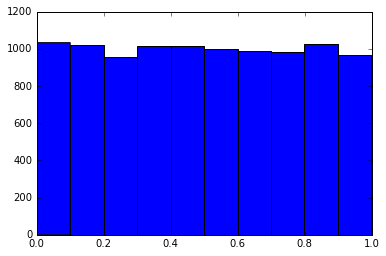

In [2]:
N = 10000

energy = np.random.rand(N)
plt.hist(energy)

In [3]:
def collision(energy,Amp):
    Np = np.size(energy)
    prob = Amp*np.sin(np.pi*energy)
    np.random.seed(1231)
    temp = np.random.rand(Np)

    collided = energy[np.where(temp<prob)]
    number = np.sum(temp<prob)
    return collided, number

654


<function close>

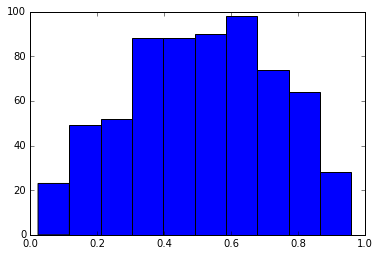

In [7]:
Amp = 0.1
collided, J0 = collision(energy,Amp)
print J0
plt.hist(collided)

with open('data/energy.bin', 'wb') as f:
    f.write(energy)
with open('data/collided.bin', 'wb') as f:
    f.write(collided)
f.close

[  1.00000000e+10   8.85866790e+08   7.84759970e+07   6.95192796e+06
   6.15848211e+05   5.45559478e+04   4.83293024e+03   4.28133240e+02
   3.79269019e+01   3.35981829e+00   2.97635144e-01   2.63665090e-02
   2.33572147e-03   2.06913808e-04   1.83298071e-05   1.62377674e-06
   1.43844989e-07   1.27427499e-08   1.12883789e-09   1.00000000e-10]
[  9.34600000e-07   1.05501189e-05   1.19093740e-04   1.34437527e-03
   1.51758174e-02   1.71310377e-01   1.93381645e+00   2.18109671e+01
   2.44022041e+02   2.49953994e+03   6.44749129e+03   7.13025756e+03
   7.70639832e+03   9.66586048e+03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


<function close>

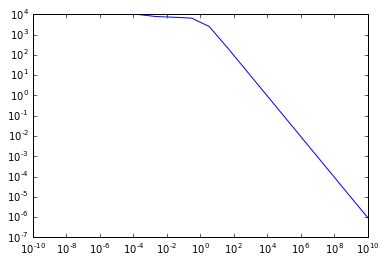

In [5]:
Nk = 20
Ak = np.linspace(-10.0,10.0,Nk)
Ak = 10.0**(-Ak)
print Ak
ek = np.zeros(Nk)
for i in range(Nk):
    temp, J1 = collision(energy,Amp+Ak[i])
    dJdA = (J1*1.0-J0*1.0)/Ak[i]
    ek[i] = abs(dJdA)
print ek
plt.loglog(Ak,ek)
with open('data/Ak.bin', 'wb') as f:
    f.write(Ak)
with open('data/ek.bin', 'wb') as f:
    f.write(ek)
f.close

<function close>

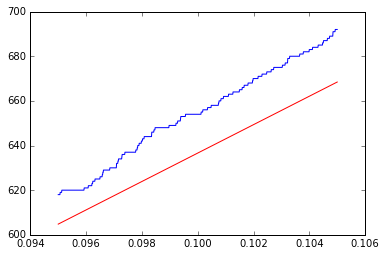

In [6]:
Nk = 1000
Ak = np.linspace(-0.005,0.005,Nk)
Jk = np.zeros(Nk,dtype=np.int32)
for i in range(Nk):
    temp, Jk[i] = collision(energy,Amp+Ak[i])
    
plt.plot(Amp+Ak,Jk,Amp+Ak,2.0*N/np.pi*(Amp+Ak),'-r')
with open('data/Amp.bin', 'wb') as f:
    f.write(Amp+Ak)
with open('data/J.bin', 'wb') as f:
    f.write(Jk)
f.close